In [25]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [26]:
#Dataset Processing

csv_path = "LakeviewFp.xlsx"
df = pd.read_excel(csv_path)

feature_keys = [
    "Week",
    "Month",
    "Clients",
    "Class",
    "Temperature",
    "Rain",
    "Covid",
    "CPI",
    "ER",
    "School"
]

u=4
start=u
end=int(df.shape[0])-start
selected_features = [feature_keys[i] for i in [0, 2, 3, 4, 5, 6, 7, 8, 9]]
features = df[selected_features]
features=features.values



#Training data and Validation data
l=len(features)
x=[]
for j in range(l-u):
    y=[features[j+u][1]]
    for k in range(u):
        y=np.append(y, features[j+k])
    x.append(y.tolist())
features=np.array(x)
np.random.seed(1)
a=np.arange(len(features))

features_new=[]
y_new=[]
f_new=[]
for i in a:
    features_new.append(features[i][1:])
    y_new.append(features[i][0])
    
#inference data split
split=0.5
split=round(split*len(features))
X=features_new[0:split-1]
Y=y_new[0:split-1]
next_split=0.9
train_split=round(next_split*len(Y))
x_train=X[0:train_split-1]
y_train=Y[0:train_split-1]
y_val=Y[train_split:]
x_val=X[train_split:]
X1=features_new[split:]
Y1=y_new[split:]
next_split=0.9
train_split=round(next_split*len(Y1))
x_train1=X1[0:train_split-1]
y_train1=Y1[0:train_split-1]
y_val1=Y1[train_split:]
x_val1=X1[train_split:]
print(len(x_train))
print(len(y_train))
l=len(y_train1)
print(l)
for i in range(l):
    x_train.append(x_train1[i])
    y_train.append(y_train1[i])
print(len(x_train))
print(len(y_train))
for i in range(len(y_val1)):
    x_val.append(x_val1[i])
    y_val.append(y_train1[i])
print('Samples of Training Data:')
print(len(y_train)) 
print('Samples of Inference Data:')
print(len(y_val))

149
149
150
299
299
Samples of Training Data:
299
Samples of Inference Data:
34


In [27]:
regress=linear_model.Ridge(alpha=0.5, normalize=True).fit(x_train, y_train)
y_pred=regress.predict(x_train)
score = np.mean(np.abs(y_pred - y_train) / np.abs(y_train))
print('Training Error: ')
print(score)
y_pred=regress.predict(x_val)
score = np.mean(np.abs(y_pred - y_val) / np.abs(y_val))
print('Inference Error: ')
print(score)

Training Error: 
0.41859147879568626
Inference Error: 
0.4165711154891227


In [28]:
a=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
score1=[]
score=[]
for i in a:
    regress=linear_model.Ridge(alpha=i, normalize=True).fit(x_train, y_train)
    regress.fit(x_train, y_train)
    y_pred1=regress.predict(x_train)
    y_pred=regress.predict(x_val)
    #print(y_pred)
    score1.append(np.mean(np.abs(y_pred1 - y_train) / np.abs(y_train)))
    score.append(np.mean(np.abs(y_pred - y_val) / np.abs(y_val)))

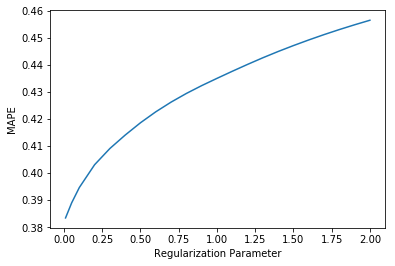

In [29]:
fig = plt.figure()
plt.plot(a, score1)
plt.xlabel('Regularization Parameter')
plt.ylabel('MAPE')
fig.savefig('trainingErrorRidge.png')

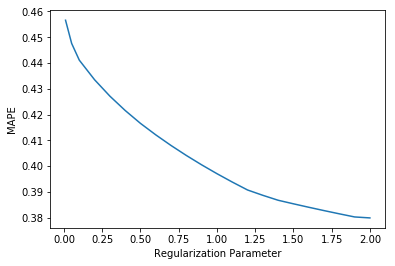

In [30]:
fig = plt.figure()
plt.plot(a, score)
plt.xlabel('Regularization Parameter')
plt.ylabel('MAPE')
fig.savefig('inferenceErrorRidge.png')